In [41]:
import tensorflow as tf
import os
import cv2
import imghdr
from matplotlib import pyplot as plt
import numpy as np


In [15]:
data_dir = 'data'

In [22]:
os.listdir(os.path.join(data_dir, 'Coppersmith-Barbet'))

['Common-Tailorbird_1152.jpg',
 'Common-Tailorbird_85.jpg',
 'Common-Tailorbird_91.jpg',
 'Common-Tailorbird_1146.jpg',
 'Common-Tailorbird_506.jpg',
 'Common-Tailorbird_260.jpg',
 'Common-Tailorbird_46.jpg',
 'Common-Tailorbird_274.jpg',
 'Common-Tailorbird_1185.jpg',
 'Common-Tailorbird_248.jpg',
 'Common-Tailorbird_1436.jpg',
 'Common-Tailorbird_1350.jpg',
 'Common-Tailorbird_1344.jpg',
 'Common-Tailorbird_1422.jpg',
 'Common-Tailorbird_923.jpg',
 'Common-Tailorbird_1378.jpg',
 'Common-Tailorbird_937.jpg',
 'Common-Tailorbird_1393.jpg',
 'Common-Tailorbird_1387.jpg',
 'Common-Tailorbird_710.jpg',
 'Common-Tailorbird_738.jpg',
 'Common-Tailorbird_857.jpg',
 'Common-Tailorbird_1218.jpg',
 'Common-Tailorbird_843.jpg',
 'Common-Tailorbird_116.jpg',
 'Common-Tailorbird_670.jpg',
 'Common-Tailorbird_664.jpg',
 'Common-Tailorbird_102.jpg',
 'Common-Tailorbird_894.jpg',
 'Common-Tailorbird_880.jpg',
 'Common-Tailorbird_658.jpg',
 'Common-Tailorbird_1026.jpg',
 'Common-Tailorbird_472.jpg',
 

In [32]:
img = cv2.imread(os.path.join('data', 'Coppersmith-Barbet', 'Common-Tailorbird_1150.jpg'))

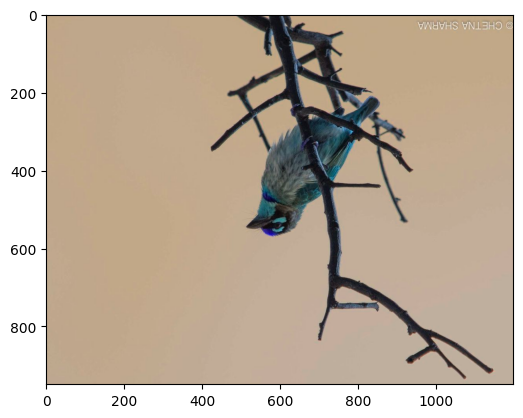

In [36]:
plt.imshow(img)


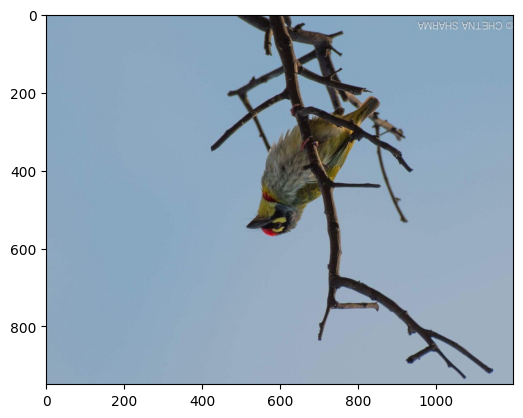

In [38]:
plt. imshow(cv2. cvtColor(img, cv2. COLOR_BGR2RGB))

In [98]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 30000 files belonging to 25 classes.


In [44]:
data_iterator = data.as_numpy_iterator()

In [45]:
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x15a575060>)

In [97]:
batch = data_iterator.next()

In [50]:
batch

(array([[[[  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ],
          ...,
          [  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ]],
 
         [[  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ],
          ...,
          [  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ]],
 
         [[  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ],
          ...,
          [  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ],
          [  0.       ,   0.       ,   0.       ]],
 
         ...,
 
         [[ 

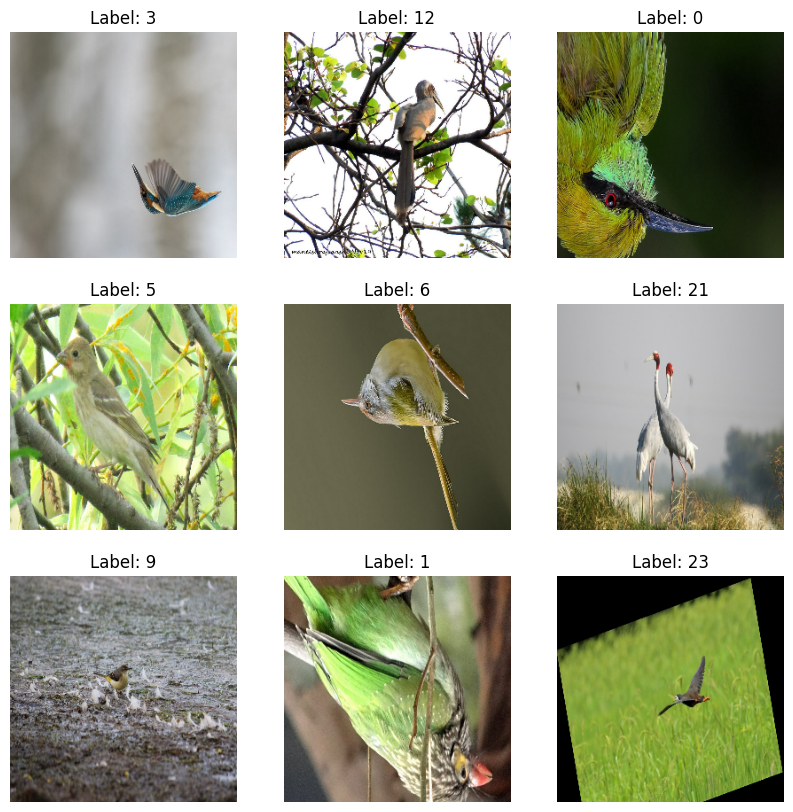

In [68]:
import matplotlib.pyplot as plt

# Unpack a single image and label from the batch
images, labels = batch
plt.figure(figsize=(10, 10))

for i in range(9):  # Show first 9 images
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].astype("uint8"))  # Convert to uint8 for display
    plt.title(f"Label: {labels[i]}")
    plt.axis("off")

plt.show()


In [60]:
import numpy as np

images, labels = batch
num_zeros = np.sum(images == 0)
total_pixels = np.prod(images.shape)
print(f"Percentage of zero pixels: {num_zeros / total_pixels * 100:.2f}%")


Percentage of zero pixels: 6.95%


In [71]:
scaled = batch[0]/255

In [72]:
scaled.max()

np.float32(1.0)

In [66]:
batch[1]

array([ 3, 12,  0,  5,  6, 21,  9,  1, 23,  1,  7, 17,  3, 11,  6,  0, 13,
       24,  3, 20,  2,  4,  7, 15, 19, 17, 18,  4,  5, 22,  2, 14],
      dtype=int32)

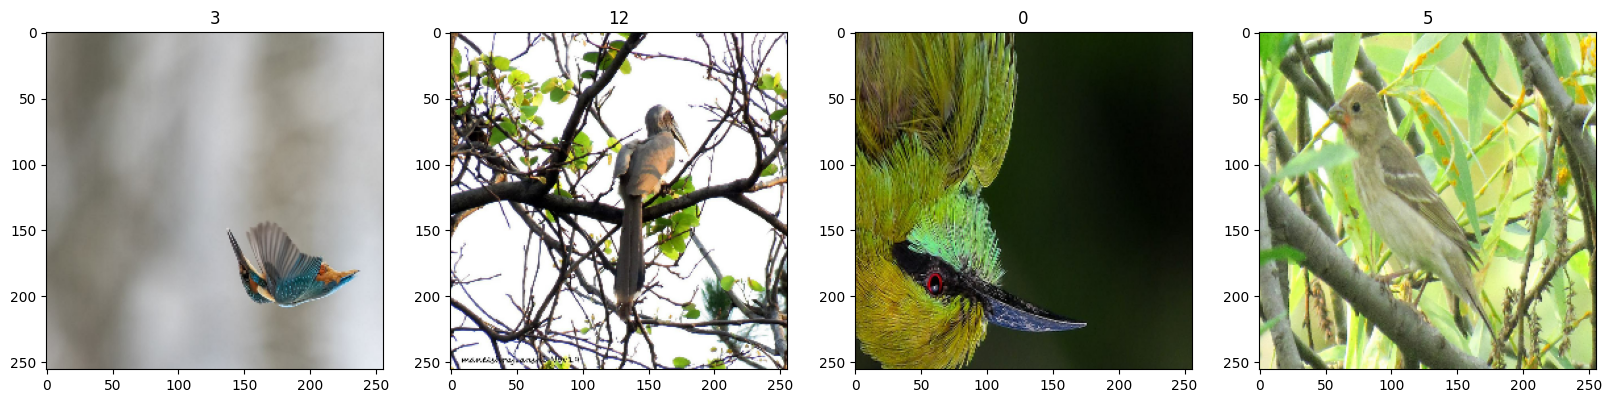

In [67]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]) :
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

PRE PROCESS DATA

In [114]:
data = data.map(lambda x,y: (x/255, y))

In [115]:
data.as_numpy_iterator().next()

(array([[[[1.22602023e-05, 1.24411290e-05, 1.27426720e-05],
          [1.21973026e-05, 1.23782283e-05, 1.26797713e-05],
          [1.21249786e-05, 1.23059044e-05, 1.26074483e-05],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],
 
         [[1.19484121e-05, 1.21293378e-05, 1.24308808e-05],
          [1.19704391e-05, 1.21513649e-05, 1.24529079e-05],
          [1.20372251e-05, 1.22181518e-05, 1.25196948e-05],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],
 
         [[1.20458235e-05, 1.22267493e-05, 1.25282932e-05],
          [1.20210889e-05, 1.22020147e-05, 1.25035576e-05],
          [1.21114335e-05, 1.22923593e-05, 1.25939023e-05],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.0000

In [109]:
scaled_iterator = data.as_numpy_iterator()

In [110]:
batch = scaled_iterator.next()[0].max()

In [111]:
batch

np.float32(0.003921569)

IndexError: invalid index to scalar variable.

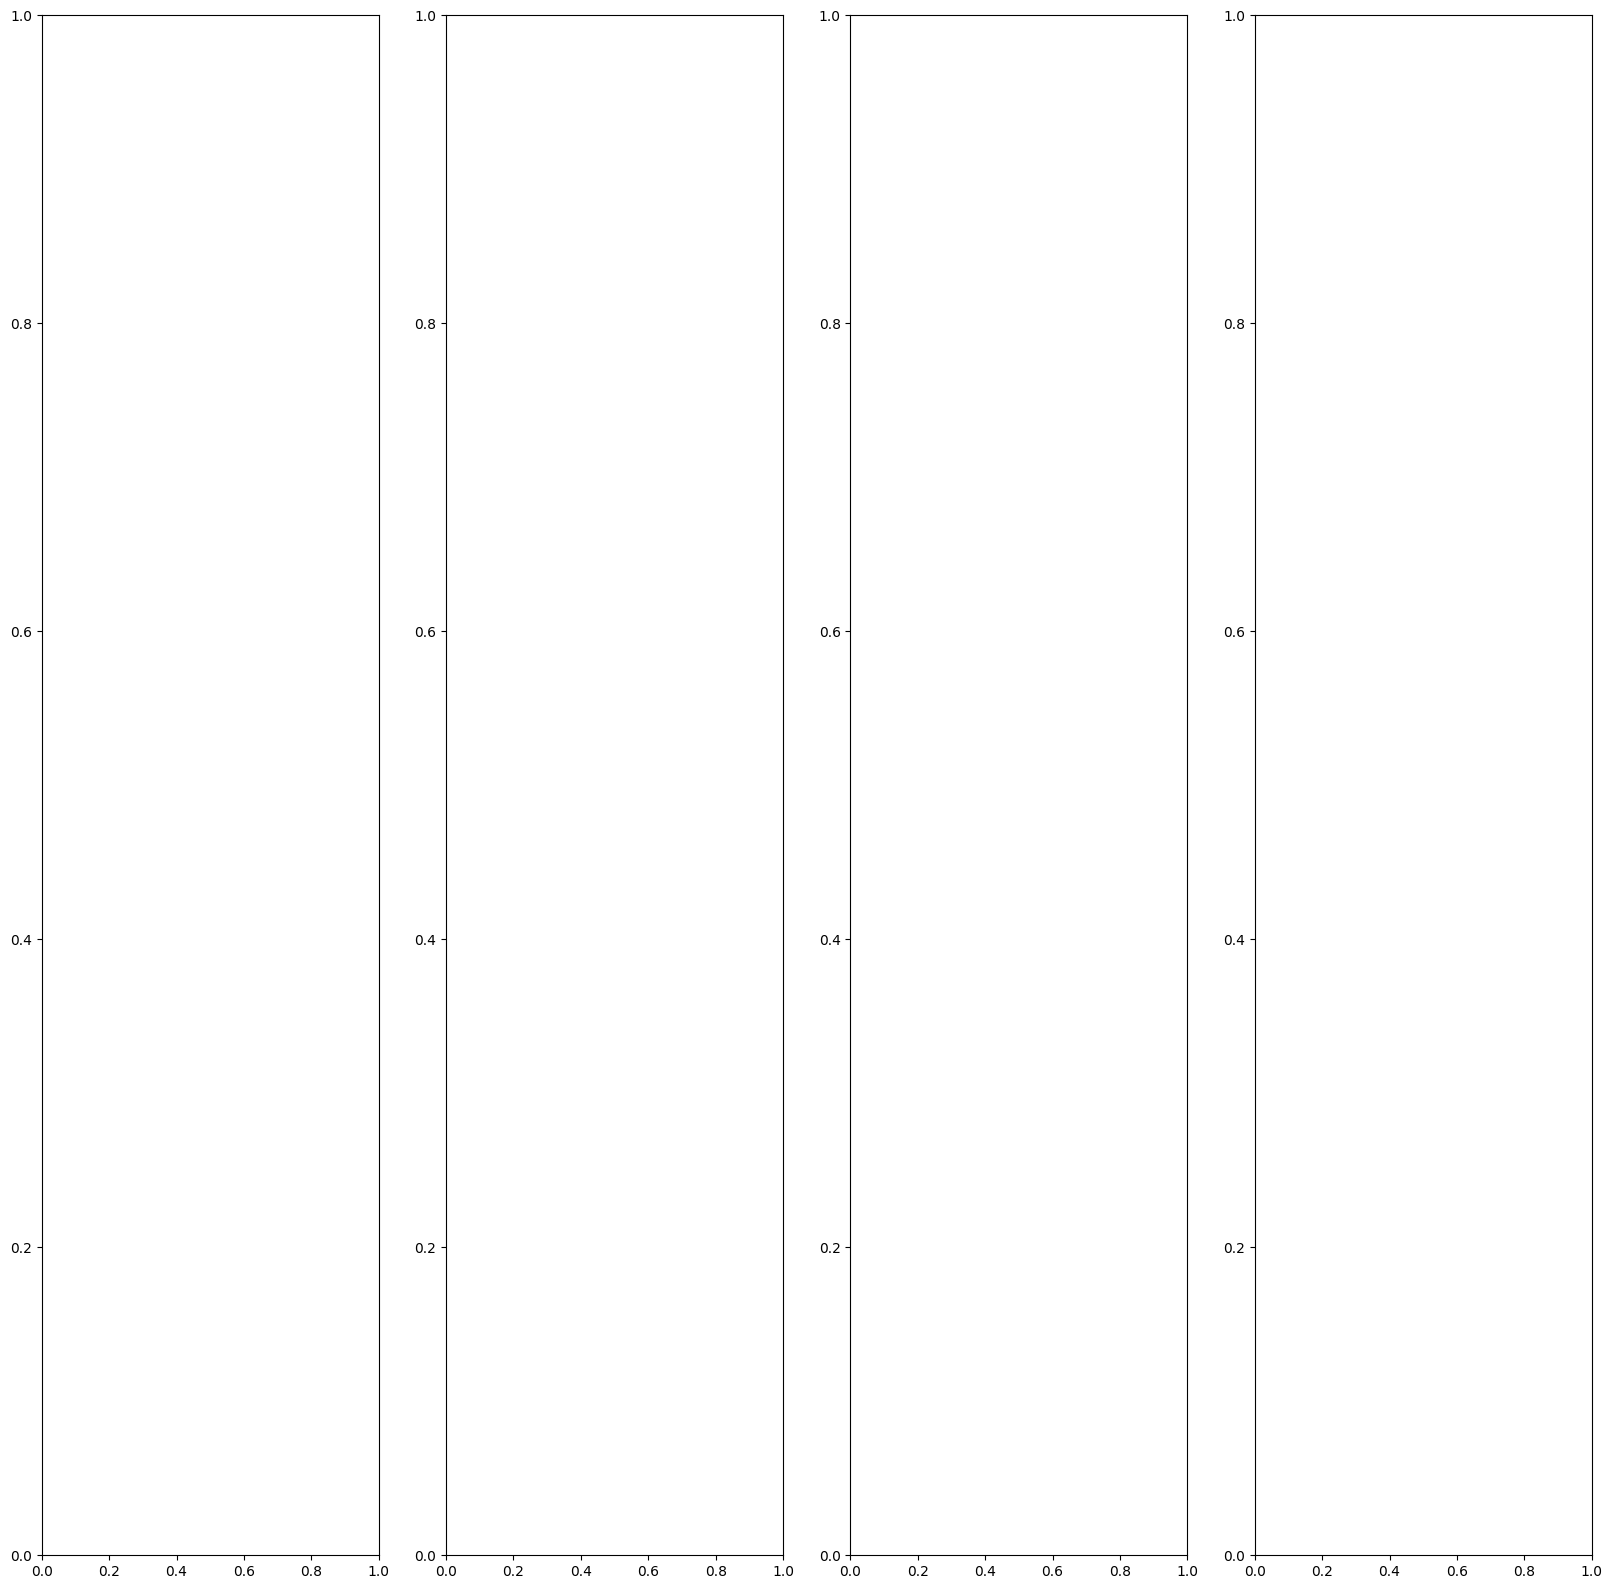

In [112]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]) :
    ax[idx]. imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [104]:
print(f"Shape of batch[0]: {batch[0].shape}")
print(f"Type of batch[0]: {type(batch[0])}")


IndexError: invalid index to scalar variable.